# Milestone 2 Phase 1

## Introduction

Nama  : Fitri Octaviani

Batch : HCK 006

## Objective

Pada kasus ini saya mencoba untuk membuat model yang dapat melakukan prediksi kemungkinan seseorang memiliki penyakit liver atau tidak berdasarkan riwayat penyakit seseorang. Pada model ini, objektif yang saya ambil adalah untuk mencari model yang mampu memprediksi yang sangat akurat untuk mencegah kecemasan pada seseorang yang sebenarnya tidak memiliki penyakit liver.

## About the Data

Dataset yang saya ambil https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

Pada dataset tersebut terdapat beberapa kolom, diantaranya :
- Age: Usia pasien
- Gender: Jenis kelamin pasien
- Total_Bilirubin: Jumlah bilirubin dalam darah pasien
- Direct_Bilirubin: Jumlah bilirubin langsung dalam darah pasien
- Alkaline_Phosphatase: Kadar fosfatase alkalin dalam darah pasien
- Alamine_Aminotransferase: Kadar enzim alamin aminotransferase dalam darah pasien
- Aspartate_Aminotransferase: Kadar enzim aspartat aminotransferase dalam darah pasien
- Total_Protiens: Jumlah total protein dalam darah pasien
- Albumin: Kadar albumin dalam darah pasien
- Albumin_and_Globulin_Ratio: Rasio albumin dan globulin dalam darah pasien
- Dataset: Label untuk klasifikasi pasien sebagai pengidap penyakit hati atau non-pengidap penyakit hati (kategorikal: "1" untuk pasien dengan penyakit liver, "2" untuk pasien tanpa penyakit liver).

# Import Library

In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
# library yang dibutuhkan
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

# Data Loading

In [ ]:
df = pd.read_csv('/content/sample_data/h8dsft_P1M2_Fitri Octaviani.csv')

In [ ]:
# menampilkan data teratas
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
# menampilkan data terbawah
df.tail(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
# melihat shape dataframe
df.shape

(583, 11)

In [ ]:
# melihat kolom-kolom dataframe
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
# melihat informasi dataset dari tipe data, jumlah baris, dan memori data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Dataset ini berisi 583 dari 11 columns. Dalam 11 columns, terdapat missing value pada kolom Albumin_and_Globulin_Ratio. Dalam kolom tersebut terdapat categorical yaitu kolom Gender. Dalam kolom target pun Dataset juga termasuk kategorikal, dimana value 1 memiliki penyakit liver dan value 2 tidak memiliki penyakit liver.

In [ ]:
# menampilkan missing value
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Terdapat missing value pada kolom Albumin_and_Globulin_Ratio.

In [ ]:
# percentase missing value
df.Albumin_and_Globulin_Ratio.isna().sum()/df.Dataset.count()

0.00686106346483705

Kolom Albumin_and_Globulin_Ratio memiliki missing value yang sangat sedikit, bahkan tidak sampai 1%. Sehingga untuk mengatasi missing value tersebut akan dilakukan drop.

In [ ]:
# Menghapus baris dengan missing value pada kolom 'Albumin_and_Globulin_Ratio'
df.dropna(subset=['Albumin_and_Globulin_Ratio'], inplace=True)

In [ ]:
# melihat kembali missing value
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Missing value sudah tidak ada.

In [ ]:
# memeriksa describe data
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Berdasarkan data diatas tercatat bahwa rata-rata pasien berumur 44 tahun, dengan pasien termuda berumur 4tahun dan tertua 90 tahun.

In [ ]:
# melihat list kolom yang memiliki nilai sebagai kategori
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

['Gender']

In [ ]:
# melihat list kolom yang memiliki nilai sebagai numerikal
num_cols = df.describe().columns.tolist()
num_cols

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [ ]:
# numerical overview
for i in num_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)


Column:  Age
Total unique labels:  72
------------------------------
Column:  Total_Bilirubin
Total unique labels:  113
------------------------------
Column:  Direct_Bilirubin
Total unique labels:  80
------------------------------
Column:  Alkaline_Phosphotase
Total unique labels:  262
------------------------------
Column:  Alamine_Aminotransferase
Total unique labels:  152
------------------------------
Column:  Aspartate_Aminotransferase
Total unique labels:  177
------------------------------
Column:  Total_Protiens
Total unique labels:  58
------------------------------
Column:  Albumin
Total unique labels:  40
------------------------------
Column:  Albumin_and_Globulin_Ratio
Total unique labels:  69
------------------------------
Column:  Dataset
Total unique labels:  2
------------------------------


# Exploratory Data Analysis

In [ ]:
# menyimpan hasil dataframe
df_clean = df.copy()

In [ ]:
# mengubah nama kolom Dataset menjadi Liver
df_clean.rename(columns={"Dataset": "Liver"}, inplace=True)

In [ ]:
df_clean.shape

(579, 11)

In [ ]:
# melihat baris pertama df_clean
df_clean.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# melihat jumlah duplikat data
df_clean.duplicated().sum()

13

Dalam dataset tersebut terdapat 13 data yang duplikat, sehingga perlu di handling dengan cara di drop karena dapat jika beberapa entri atau sampel terduplikasi berulang kali, dapat menyebabkan pengaruh yang tidak proporsional pada model.

In [ ]:
# drop kolom duplikat
df_clean.drop_duplicates(inplace=True)

In [ ]:
# melihat kembali jumlah duplikat data
df_clean.duplicated().sum()

0

In [ ]:
df_clean.shape

(566, 11)

In [ ]:
# melihat kembali missing value
df_clean.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver                         0
dtype: int64

In [ ]:
# memisahkan kolom numerikal dan kategorikal
num_col = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
cat_col = ['Gender', 'Liver']

In [ ]:
# melihat jumlah kemunculan unique value dalam kategorikal
for i in cat_col:
  print(i)
  print(df_clean[i].value_counts())
  print('-'*30)

Gender
Male      428
Female    138
Name: Gender, dtype: int64
------------------------------
Liver
1    404
2    162
Name: Liver, dtype: int64
------------------------------


In [ ]:
# membuat dataframe baru untuk EDA
df_eda = df_clean.copy()

## Categorical Feature

In [ ]:
# mengubah isi kolom Liver label 1 dan 2 menjadi kategori
df_eda['Liver'] = df_eda['Liver'].replace({1: 'Liver', 2: 'No liver'})

In [ ]:
df_eda.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver


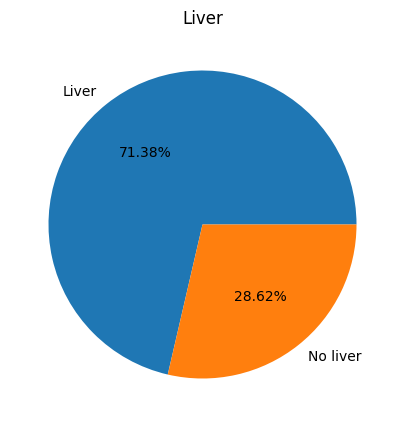

In [ ]:
#pie chart melihat jumlah kolom target
plt.figure(figsize=(5, 5))
plt.pie(df_eda['Liver'].value_counts(), labels=df_eda['Liver'].value_counts().index, autopct='%.2f%%')
plt.title('Liver')
plt.show()

Berdasarkan pie chart di atas, dataset dengan value Liver jauh lebih banyak di banding value No liver. Sehingga terlihat pada kolom yang akan menjadi target memiliki class imbalance.

In [ ]:
# Menghitung jumlah sampel dalam setiap kelas
class_counts = df_eda['Liver'].value_counts()

# Menghitung persentase kelas
class_percentage = class_counts / class_counts.sum() * 100

# Menghitung selisih persentase antara dua kelas
class_imbalance = abs(class_percentage.iloc[0] - class_percentage.iloc[1])

print(f"Selisih persentase kelas: {class_imbalance:.2f}%")


Selisih persentase kelas: 42.76%


Selisih persentase antara value Liver dan No Liver adalah sebanyak 42.76%. Hal ini sangat terlihat jelas bahwa value Liver hampir 2x lipat dari value No liver.

Gender  Liver   
Female  Liver        90
        No liver     48
Male    Liver       314
        No liver    114
dtype: int64


Text(0.5, 1.0, 'Jumlah Kategori Liver Berdasarkan Gender')

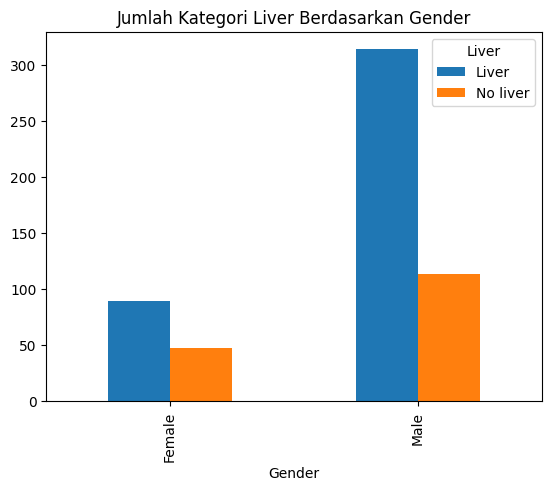

In [ ]:
#melihat total kategori meninggal berdasarkan Gender
print(df_eda.groupby(['Gender','Liver']).size())
df_eda.groupby(['Gender','Liver']).size().unstack(fill_value=0).plot(kind='bar').set_title('Jumlah Kategori Liver Berdasarkan Gender')

Berdasarkan Gender, pasien yang paling banyak memiliki penyakit liver adalah laki-laki.

## Numerical Feature

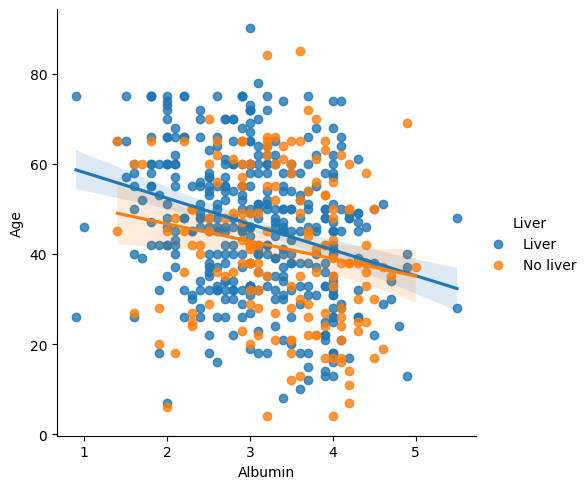

In [ ]:
#membuat scatter plot untuk melihat sebaran data
sns.lmplot(df_eda, x='Albumin',y='Age', hue='Liver')

Berdasarkan scatterplot di atas, albumin dan umur cukup mempengaruhi Liver.

In [ ]:
df[num_col].nunique()

Age                            72
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          262
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
dtype: int64

<Axes: xlabel='Liver', ylabel='Albumin'>

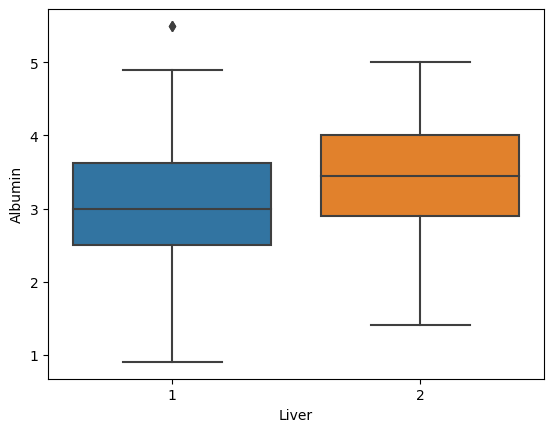

In [ ]:
sns.boxplot(data=df_clean, x='Liver', y='Albumin')

# Feature Engineering

In [ ]:
df_clean.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver'],
      dtype='object')

In [ ]:
# menyimpan hasil feature engineering
df_analys = df_clean.copy()

In [ ]:
df_analys[num_col].head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
df_analys[cat_col].head()

,Gender,Liver
0,Female,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1


## Split Dataset

Dalam tahap ini, dataset dibagi menjadi train dan test. Untuk feature merupakan semua kolom kecuali Liver, karena Liver merupakan target.

In [ ]:
#split antara fitur dan target
X = df_analys.drop('Liver',axis=1)
y = df_analys['Liver']

In [ ]:
#memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Cetak ukuran setiap subset
print("Shape:", df_analys.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shape: (566, 11)
X_train: (396, 10)
X_test: (170, 10)
y_train: (396,)
y_test: (170,)


Dalam train test ini data akan dibagi menjadi 70% untuk data train dan 30% untuk data test. Dari hasil tersebut maka didapatkan untuk train sebanyak 396 baris dan 10 kolom, untuk data test sebanyak 170 baris dan 10 kolom.

## Numerical Feature

In [ ]:
num_col

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

<Axes: >

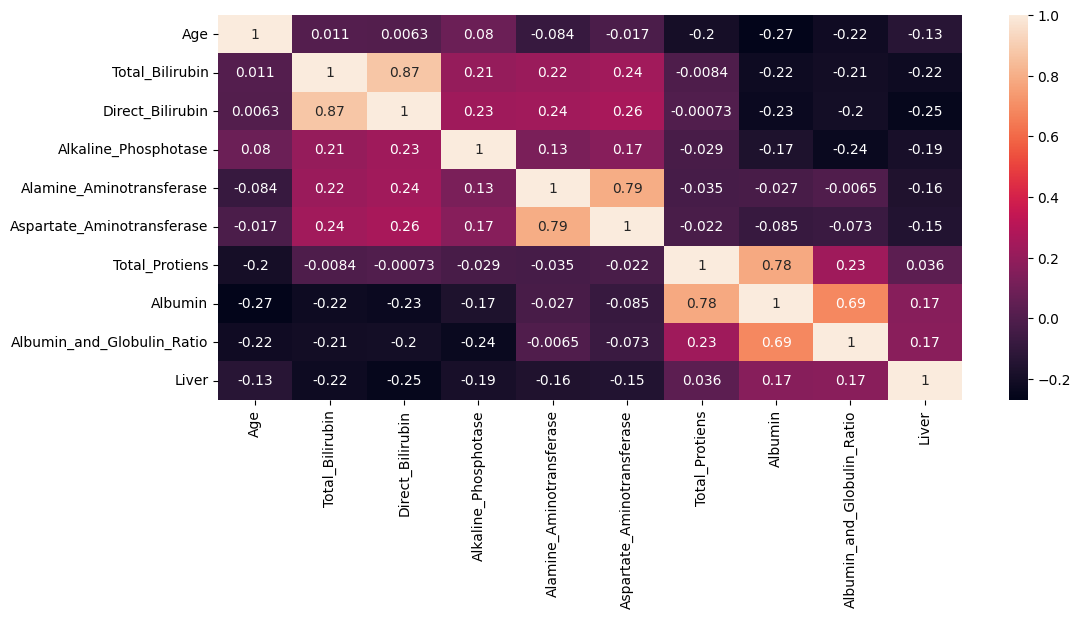

In [ ]:
# cek korelasi antar kolom menggunakan metode pearson
cor = df_analys.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 5))
sns.heatmap(cor, annot=True)

In [ ]:
# cek korelasi yang memiliki signifikansi terhadap Liver
df_analys.corr().Liver.sort_values(ascending=False)

<ipython-input-45-ebb628fad916>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_analys.corr().Liver.sort_values(ascending=False)


Liver                         1.000000
Albumin_and_Globulin_Ratio    0.171402
Albumin                       0.165273
Total_Protiens                0.036443
Age                          -0.133821
Aspartate_Aminotransferase   -0.151009
Alamine_Aminotransferase     -0.161617
Alkaline_Phosphotase         -0.186057
Total_Bilirubin              -0.224467
Direct_Bilirubin             -0.250926
Name: Liver, dtype: float64

Berdasarkan korelasi pearson diatas, kolom yang saya ambil adalah korelasi yang bernilai + saja. Hal ini karena saya tertarik untuk mempertahankan variabel yang memiliki hubungan hubungan linier positif dengan variabel target (Liver). Hal ini dilakukan untuk mengurangi dimensi data dan memastikan hanya mempertahankan fitur yang memiliki pengaruh positif pada prediksi target.

Selain itu, setelah saya coba menggunakan beberapa kolom yang memiliki korelasi - ternyata hasil performanya buruk. Sehingga dalam hal ini saya hanya menggunakan kolom :
- Albumin_and_Globulin_Ratio
-Albumin
- Total_Protiens.

In [ ]:
# drop kolom yang korelasinya rendah
df_analys.drop(columns = ['Direct_Bilirubin', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Age'], inplace=True)

### Handling Outlier

Dalam tahap ini akan dilakukan handling putlier pada kolom numerikal kontinu dengan melihat distribusi dan outlier.

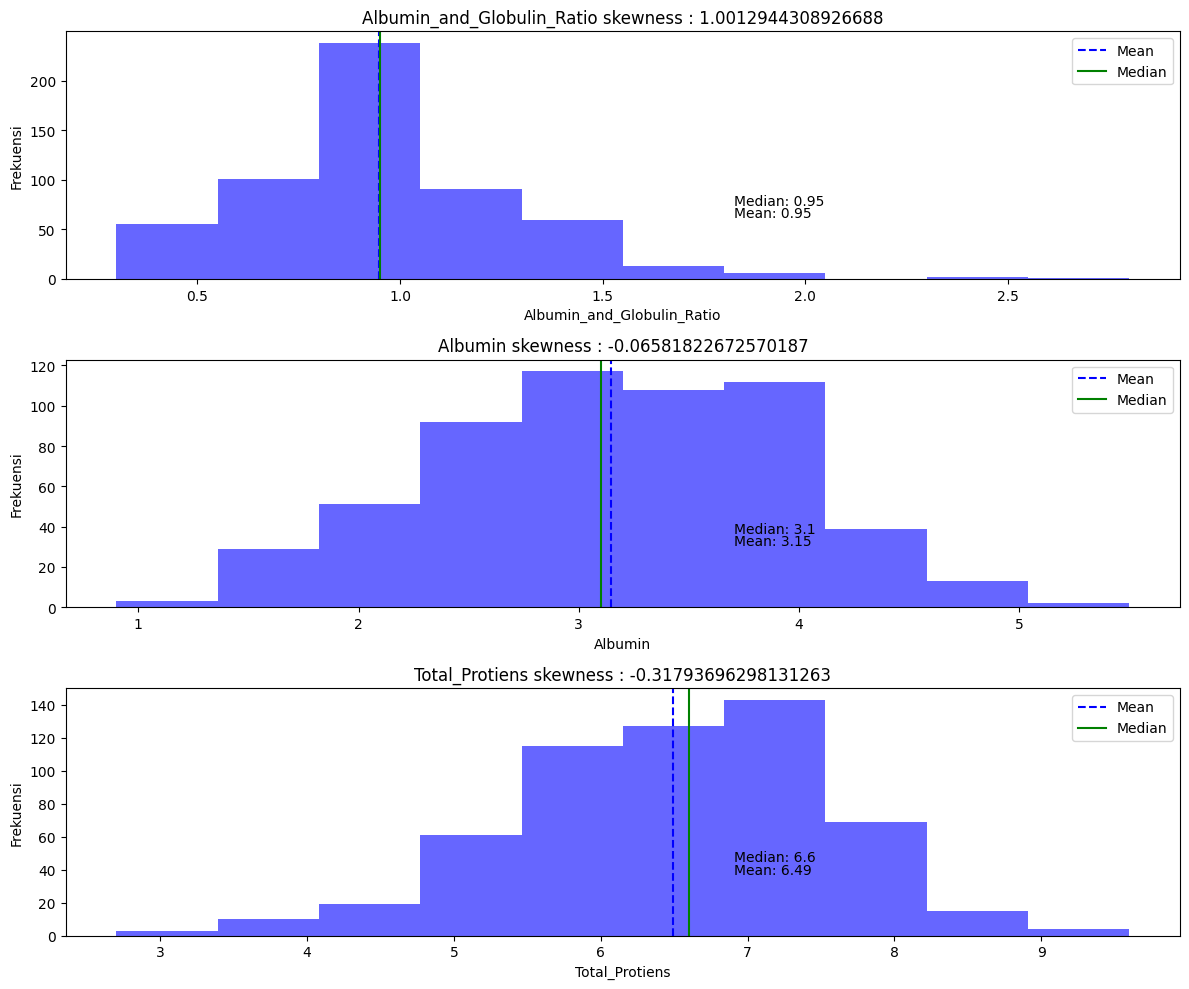

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

for i, j in enumerate(['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens']):
    a = df_analys[j]
    ax[i].hist(a, bins=10, alpha=0.6, color='blue')
    ax[i].set_xlabel(j)
    ax[i].set_ylabel('Frekuensi')
    ax[i].set_title(f'{j} skewness : {a.skew()}')
    ax[i].text(0.6, 0.25, f'Mean: {a.mean():.2f}', color='black', transform=ax[i].transAxes)
    ax[i].text(0.6, 0.3, f'Median: {a.median()}', color='black', transform=ax[i].transAxes)
    ax[i].axvline(a.mean(), color='blue', linestyle='--', linewidth=1.5, label='Mean')
    ax[i].axvline(a.median(), color='green', linestyle='-', linewidth=1.5, label='Median')
    ax[i].legend()

plt.tight_layout()
plt.show()


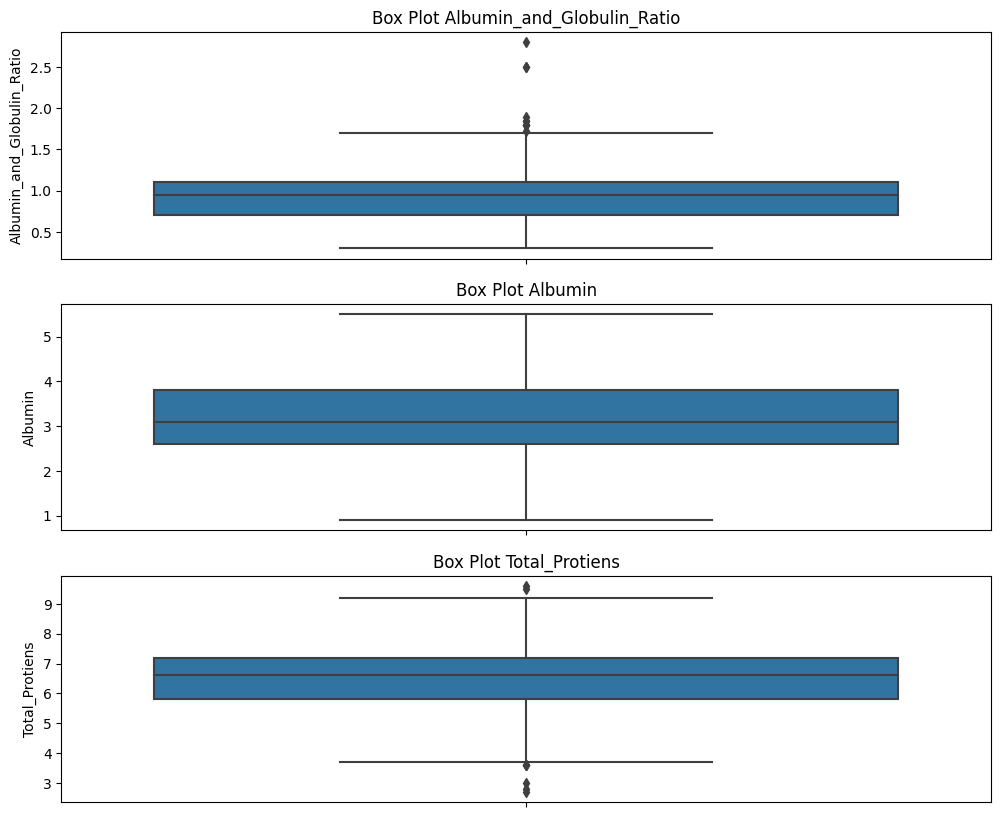

In [ ]:
#membuat box plot setiap kategori default untuk Albumin_and_Globulin_Ratio, Albumin
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for i, j in enumerate(['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens']):
    sns.boxplot(data=df_analys, y=f'{j}', ax=ax[i])
    ax[i].set_title(f'Box Plot {j}')

plt.show()

In [ ]:
#memeriksa outlier Albumin_and_Globulin_Ratio
Q1 = df_analys['Albumin_and_Globulin_Ratio'].quantile(.25)
Q3 = df_analys['Albumin_and_Globulin_Ratio'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['Albumin_and_Globulin_Ratio'] <= lower) | (df_analys['Albumin_and_Globulin_Ratio'] >= upper)]

print('percentage: ', len(outlier)/df_eda.shape[0] * 100, '%')

percentage:  1.76678445229682 %


In [ ]:
#memeriksa outlier Albumin
Q1 = df_analys['Albumin'].quantile(.25)
Q3 = df_analys['Albumin'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['Albumin'] <= lower) | (df_analys['Albumin'] >= upper)]

print('percentage: ', len(outlier)/df_eda.shape[0] * 100, '%')

percentage:  0.0 %


In [ ]:
#memeriksa outlier Total_Protiens
Q1 = df_analys['Total_Protiens'].quantile(.25)
Q3 = df_analys['Total_Protiens'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_analys[(df_analys['Total_Protiens'] <= lower) | (df_analys['Total_Protiens'] >= upper)]

print('percentage: ', len(outlier)/df_eda.shape[0] * 100, '%')

percentage:  1.4134275618374559 %


In [ ]:
# define kolom
cens_col = ['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens']

# create the capper
winsorizer = Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables=cens_col)

# melakukan capping pada data train
df_train = winsorizer.fit_transform(df_analys)

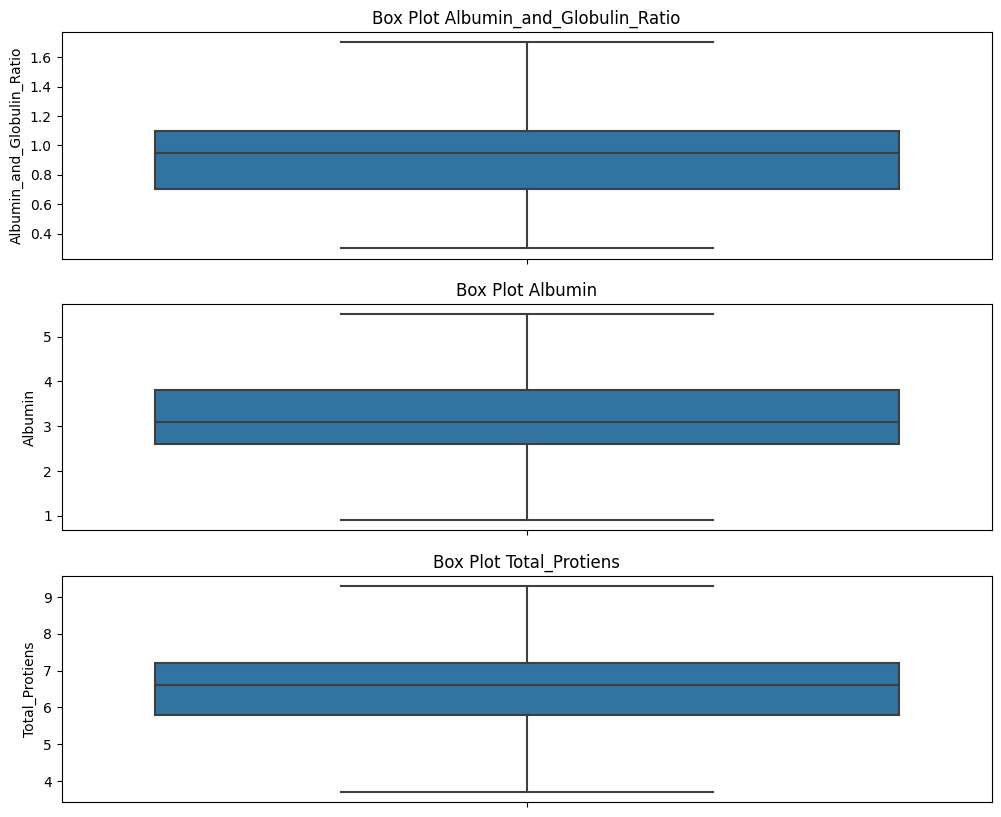

In [ ]:
#membuat box plot setiap kategori default untuk Albumin_and_Globulin_Ratio, Albumin
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for i, j in enumerate(['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens']):
    sns.boxplot(data=df_train, y=f'{j}', ax=ax[i])
    ax[i].set_title(f'Box Plot {j}')

plt.show()

### Scaling

Dalam tahap scaling, saya menggunakan StandardScaler karena distribusi pada kolom Albumin_and_Globulin_Ratio, Albumin, dan Total_Protiens merupakan distribusi normal.

In [ ]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Menggunakan StandardScaler untuk melakukan scaling pada kolom-kolom tertentu
df_scale = ['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens']
df_train[df_scale] = scaler.fit_transform(df_train[df_scale])

## Categorical Feature

In [ ]:
cat_col

['Gender', 'Liver']

## Encoding

Dalam tahap ini saya melakukan encoding untuk kolom Gender dan Liver.

In [ ]:
# Membuat objek OrdinalEncoder
encoder = OrdinalEncoder()

# Melakukan ordinal encoding pada kolom 'Gender' dan 'Liver
df_train['Gender'] = encoder.fit_transform(df_train[['Gender']])

# Melakukan ordinal encoding pada kolom 'Liver'
df_train['Liver'] = df_train['Liver'].replace({'Liver': 1, 'No liver': 2})

In [ ]:
df_train

,Gender,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver
0,0.0,0.281478,0.194225,-0.140863,1
1,1.0,0.936333,0.068445,-0.680250,1
2,1.0,0.468580,0.194225,-0.174574,1
3,1.0,0.281478,0.320004,0.196255,1
4,1.0,0.749232,-0.937791,-1.826449,1
...,...,...,...,...,...
578,1.0,-0.560478,-1.944027,-1.927584,2
579,1.0,-0.466927,0.068445,0.533372,1
580,1.0,-0.092724,0.068445,0.196255,1
581,1.0,0.281478,0.320004,0.196255,1


In [ ]:
# melihat missing value
df_train.isna().sum()

Gender                        0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver                         0
dtype: int64

<Axes: >

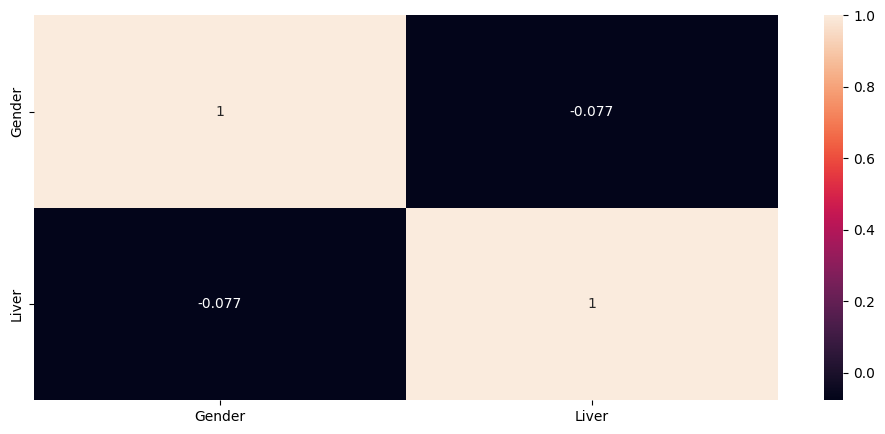

In [ ]:
#plot heatmap korelasi untuk seluruh variabel kategori
plt.figure(figsize=(12,5))
sns.heatmap(df_train[cat_col].corr(),annot=True)

In [ ]:
# cek korelasi yang memiliki signifikansi terhadap Liver
df_train[cat_col].corr().Liver.sort_values(ascending=False)

Liver     1.000000
Gender   -0.077396
Name: Liver, dtype: float64

Korelasi pearson antara Gender dan Liver memiliki nilai -. Hal ini berarti bahwa gender tidak berpengaruh terhadap penyakit liver. Seperti yang sudah saya jelaskan di atas bahwa saya hanya mengambil kolom yang memiliki nilai korelasi +. Sehingga untuk gender ini akan saya lakukan drop.

In [ ]:
# drop kolom yang korelasinya rendah
df_train.drop(columns = ['Gender'], inplace=True)

In [ ]:
df_train

,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver
0,0.281478,0.194225,-0.140863,1
1,0.936333,0.068445,-0.680250,1
2,0.468580,0.194225,-0.174574,1
3,0.281478,0.320004,0.196255,1
4,0.749232,-0.937791,-1.826449,1
...,...,...,...,...
578,-0.560478,-1.944027,-1.927584,2
579,-0.466927,0.068445,0.533372,1
580,-0.092724,0.068445,0.196255,1
581,0.281478,0.320004,0.196255,1


# Preprocessing

Pada tahap ini saya menghandling class imbalance dan membuat fungsi pipeline. Akan tetapi karena dataset saya merupakan dataset yang tidak memiliki kategorikal, sehingga saya hanya menggunakan pipeline untuk numerikal.

## Handling Class Imbalance

In [ ]:
# train-test tanpa handling imbalance
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [ ]:
# SMOTE
sm = SMOTE (sampling_strategy='minority')
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
# gabungan data train smote dengan target
df_train = X_smote.copy()
df_train['Liver'] = y_smote

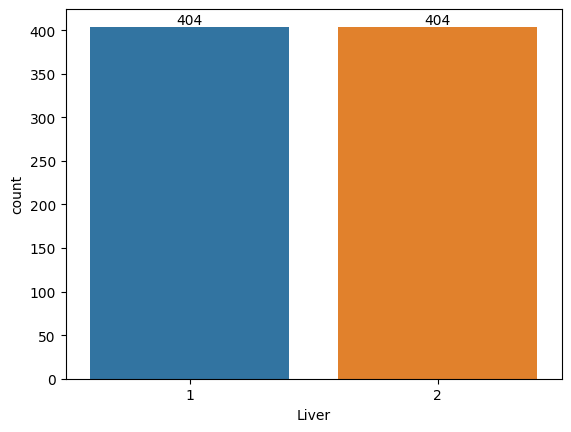

In [ ]:
# plot perbandingan jumlah target setelah handling class imbalance
ax = sns.countplot(x=df_train.Liver, data=df_train)
ax.bar_label(ax.containers[0])
plt.show()

Dalam data target yang semula mengalami class imbalance dimana value 1 berjumlah lebih banyak hampir 2x lipat dari value 2. Maka menjadi balance dengan masing-masing value berjumlah 404.

## Pipeline

Dalam kolom numerikal, outlier yang saya gunakan adalah winsorizer, imputer missing value yang digunakan adalah median, dan scaler yang digunakan adalah StandardScaler karena distribusi normal.

In [ ]:
#membuat variabel berisi fungsi pipeline untuk numerical feature
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5, missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']])
num_tr

array([[ 0.2814784 ,  0.19422491, -0.14086258],
       [ 0.93633303,  0.06844539, -0.68025009],
       [ 0.46857972,  0.19422491, -0.17457429],
       ...,
       [-0.09272424,  0.06844539,  0.19625462],
       [ 0.2814784 ,  0.32000442,  0.19625462],
       [ 0.74923171,  1.57779959,  1.88184062]])

In [ ]:
#membuat variabel berisi fungsi pipeline untuk menyimpan seluruh proses kategorikal dan numerikal dan menggunakannya untuk fit_transform ke X_train
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']),
    ])

X_train_pipe = full_pipeline.fit_transform(X_train)
X_train_pipe

array([[ 0.2814784 ,  0.19422491, -0.14086258],
       [ 0.93633303,  0.06844539, -0.68025009],
       [ 0.46857972,  0.19422491, -0.17457429],
       ...,
       [-0.09272424,  0.06844539,  0.19625462],
       [ 0.2814784 ,  0.32000442,  0.19625462],
       [ 0.74923171,  1.57779959,  1.88184062]])

In [ ]:
#menggunakan fungsi full_pipeline untuk X_test
X_test_pipe = full_pipeline.transform(X_test)

# Model Definition

Model yang saya pakai adalah KNeighborsClassifier, Decision Tree, Random Forest dan SVC untuk memprediksi target. Saya akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan cross validation. Kemudian kedua model tersebut akan dipilih dan dilakukan hyperparameter tuning, dan yang terakhir adalah hasil train test setelah dilakukan tuning.



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Model Training

Pada training model ini saya menggunakan classification report dan confusion matrix untuk mengevaluasi hasil training model.

In [ ]:
knn_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])

# train data pada model decision tree
knn_pipe.fit(X_smote, y_smote)

#menggunakan model untuk prediksi dari data train dan test
pred_knn_train = knn_pipe.predict(X_smote)
pred_knn_test = knn_pipe.predict(X_test)

#melihat hasil evaluasi model
print(classification_report(y_smote, pred_knn_train, zero_division=1))
print(classification_report(y_test, pred_knn_test, zero_division=1))

              precision    recall  f1-score   support

           1       0.78      0.73      0.75       404
           2       0.75      0.79      0.77       404

    accuracy                           0.76       808
   macro avg       0.76      0.76      0.76       808
weighted avg       0.76      0.76      0.76       808

              precision    recall  f1-score   support

           1       0.71      0.99      0.83       121
           2       0.50      0.02      0.04        49

    accuracy                           0.71       170
   macro avg       0.61      0.51      0.43       170
weighted avg       0.65      0.71      0.60       170



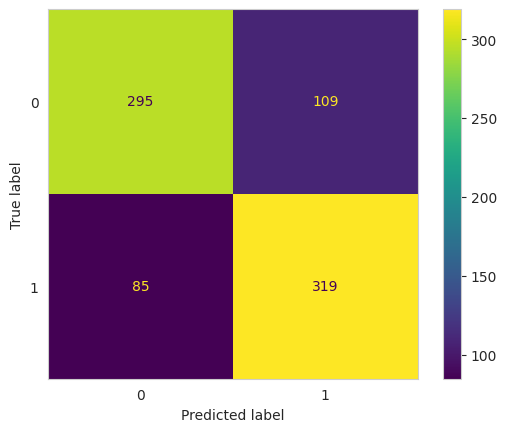

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_smote, pred_knn_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

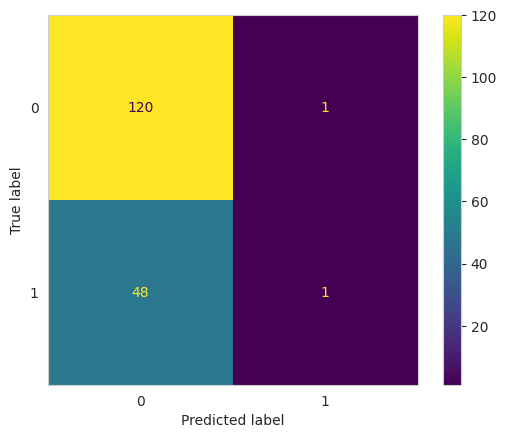

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, pred_knn_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [ ]:
dt_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', DecisionTreeClassifier(random_state=42))
    ])

# train data pada model decision tree
dt_pipe.fit(X_smote, y_smote)

#menggunakan model untuk prediksi dari data train dan test
pred_dt_train = dt_pipe.predict(X_smote)
pred_dt_test = dt_pipe.predict(X_test)

#melihat hasil evaluasi model
print(classification_report(y_smote, pred_dt_train))
print(classification_report(y_test, pred_dt_test))

              precision    recall  f1-score   support

           1       0.90      0.97      0.93       404
           2       0.96      0.90      0.93       404

    accuracy                           0.93       808
   macro avg       0.93      0.93      0.93       808
weighted avg       0.93      0.93      0.93       808

              precision    recall  f1-score   support

           1       0.70      0.92      0.80       121
           2       0.17      0.04      0.07        49

    accuracy                           0.66       170
   macro avg       0.43      0.48      0.43       170
weighted avg       0.55      0.66      0.59       170



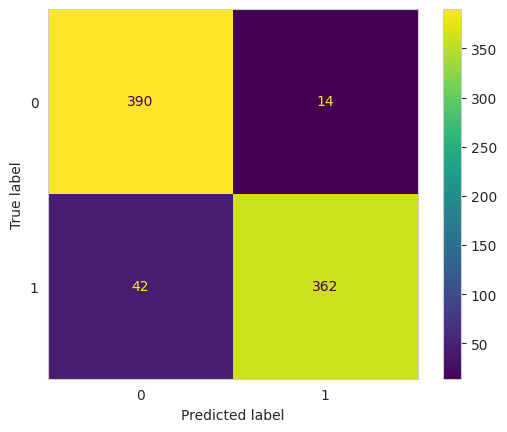

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_smote, pred_dt_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

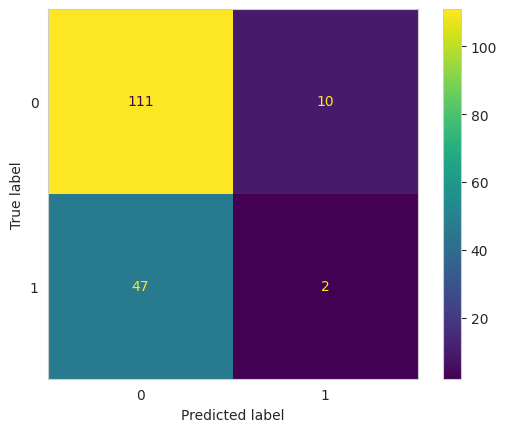

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, pred_dt_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [ ]:
rf_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', RandomForestClassifier(random_state=42))
    ])

# train data pada model decision tree
rf_pipe.fit(X_smote, y_smote)

#menggunakan model untuk prediksi dari data train dan test
pred_rf_train = rf_pipe.predict(X_smote)
pred_rf_test = rf_pipe.predict(X_test)

#melihat hasil evaluasi model
print(classification_report(y_smote, pred_rf_train))
print(classification_report(y_test, pred_rf_test))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93       404
           2       0.92      0.94      0.93       404

    accuracy                           0.93       808
   macro avg       0.93      0.93      0.93       808
weighted avg       0.93      0.93      0.93       808

              precision    recall  f1-score   support

           1       0.71      0.98      0.82       121
           2       0.00      0.00      0.00        49

    accuracy                           0.70       170
   macro avg       0.35      0.49      0.41       170
weighted avg       0.50      0.70      0.59       170



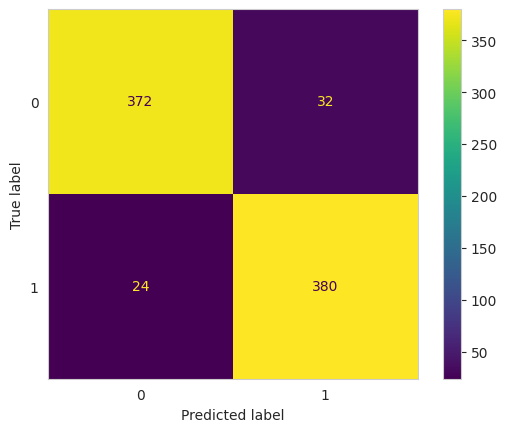

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_smote, pred_rf_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

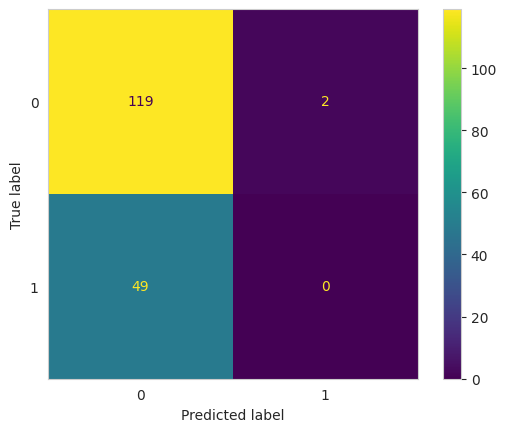

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, pred_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [ ]:
svm_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', SVC(random_state=42))
    ])

# train data pada model decision tree
svm_pipe.fit(X_smote, y_smote)

#menggunakan model untuk prediksi dari data train dan test
pred_svm_train = svm_pipe.predict(X_smote)
pred_svm_test = svm_pipe.predict(X_test)

#melihat hasil evaluasi model
print(classification_report(y_smote, pred_svm_train, zero_division=1))
print(classification_report(y_test, pred_svm_test, zero_division=1))

              precision    recall  f1-score   support

           1       0.63      0.62      0.62       404
           2       0.62      0.63      0.63       404

    accuracy                           0.62       808
   macro avg       0.62      0.62      0.62       808
weighted avg       0.62      0.62      0.62       808

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       121
           2       1.00      0.00      0.00        49

    accuracy                           0.71       170
   macro avg       0.86      0.50      0.42       170
weighted avg       0.79      0.71      0.59       170



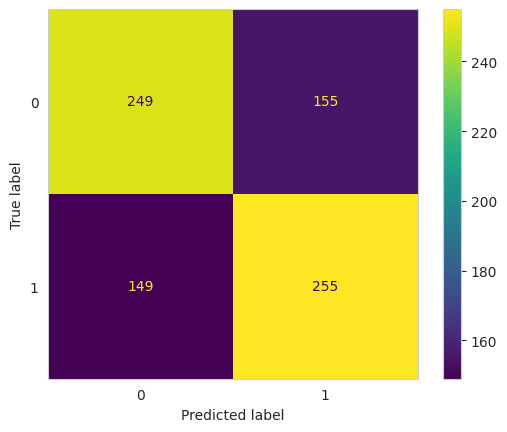

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_smote, pred_svm_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

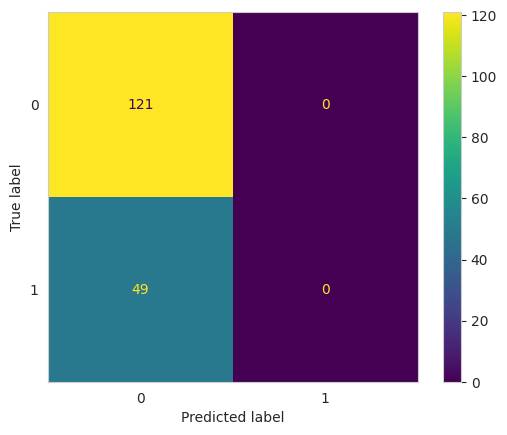

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, pred_svm_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## Cross Validation

Dalam cross validation ini untuk mengetahui best model. Metric yang saya gunakan untuk mengevaluasi model adalah precision dengan tujuan untuk meminimalisir False Positif. Dalam kasus precision ini, konteks yang saya ambil seperti yang sudah di jelaskan pada objective bahwa seseorang yang sebenarnya tidak memiliki penyakit liver namun terprediksi memiliki penyakit liver.

In [ ]:
# set scoring
split_n = 5

# check cross validation score
knn_cv = cross_val_score(knn_pipe, X_smote, y_smote, cv=5, scoring='precision')
dt_cv = cross_val_score(dt_pipe, X_smote, y_smote, cv=5, scoring='precision')
rf_cv = cross_val_score(rf_pipe, X_smote, y_smote, cv=5, scoring='precision')
svm_cv = cross_val_score(svm_pipe, X_smote, y_smote, cv=5, scoring='precision')

name_model = []
cv_scores=0
for cv, name in zip([knn_cv, dt_cv, rf_cv, svm_cv], ['knn_model', 'dt_model', 'rf_model', 'svm_model']):
    print(name)
    print('All - Cross Validation  : ', cv)
    print('Mean - Cross Validation : ', cv.mean())
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        nama_model = name
    else:
        pass
print('best model:', nama_model)
print('cross-val mean:', cv_scores)

knn_model
All - Cross Validation  :  [0.60810811 0.57831325 0.6        0.65882353 0.61445783]
Mean - Cross Validation :  0.6119405443714444
--------------------------------------------------
dt_model
All - Cross Validation  :  [0.5754717  0.54205607 0.625      0.72289157 0.67058824]
Mean - Cross Validation :  0.6272015148877481
--------------------------------------------------
rf_model
All - Cross Validation  :  [0.59223301 0.57391304 0.68333333 0.7972973  0.70930233]
Mean - Cross Validation :  0.6712158018798049
--------------------------------------------------
svm_model
All - Cross Validation  :  [0.61538462 0.57894737 0.59722222 0.56962025 0.72222222]
Mean - Cross Validation :  0.6166793362829339
--------------------------------------------------
best model: rf_model
cross-val mean: 0.6712158018798049


Dalam keempat model tersebut bahwa best model yang diperoleh adalah random forest dengan nilai cross val 0.67.

## Hyperparameter Tuning

Dari model yang telah di train, saya akan melakukan tuning hyperparameter menggunakan RandomSearchCV untuk mendapatkan model yang optimal.

Dalam parameter random forest terdapat banyak sekali hyperparameter yang dapat kita tentukan. Akan tetapi disini saya hanya mengambil 4 parameter saja, diantaranya n_estimator, criterion, max_depth, dan max_features.

In [ ]:
params = [
    {'model__n_estimators': [10, 20, 40, 60],
     'model__max_features': [2, 3, 5, 1],
     'model__max_depth': [5, 10, None],
     'model__criterion': ['gini', 'entropy']},
  ]

grid_search = GridSearchCV(rf_pipe, params, cv=10,
                           scoring='precision',
                           return_train_score=True)
grid_search.fit(X_smote, y_smote)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     missing_values='ignore',
                                                                                                     tail='both')),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Total_Protiens',
                                                                          'Albumin',
                                                                          'Albumin_and_Globulin_Ratio'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [5, 10, None],
                          'model__max_features': [2, 3, 5, 1],
                          'model__n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='precision')

In [ ]:
pd.DataFrame(grid_search.cv_results_).shape

(96, 34)

In [ ]:
#memanggil parameter terbaik
grid_search.best_params_

{'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 1,
 'model__n_estimators': 60}

Berdasarkan perhitungan grid search, untuk best parameter random forest adalah creation: gini, max_depth:none, max_features:1, dan n_estimators:60.

In [ ]:
grid_search.best_score_

0.702307429922919

In [ ]:
#membuat model dari hasil hyperparameter tuning
model = grid_search.best_estimator_

model.fit(X_smote, y_smote)

model_train = model.predict(X_smote)
model_test = model.predict(X_test)

print(classification_report(y_smote, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93       404
           2       0.93      0.93      0.93       404

    accuracy                           0.93       808
   macro avg       0.93      0.93      0.93       808
weighted avg       0.93      0.93      0.93       808

              precision    recall  f1-score   support

           1       0.71      0.98      0.82       121
           2       0.00      0.00      0.00        49

    accuracy                           0.69       170
   macro avg       0.35      0.49      0.41       170
weighted avg       0.50      0.69      0.58       170



Dalam train, target mencapai niali accuracy dan recall 93% . Sedangkan dalam test mencapai accuracy 69% dan precision untuk target value 1 mencapai 71% sedangkan untuk target value 2 mencapai 0%. Hal ini dapat terjadi karena data termasuk class imbalanced (meskipun kita telah set berbagai parameter model dan melakukan smote).

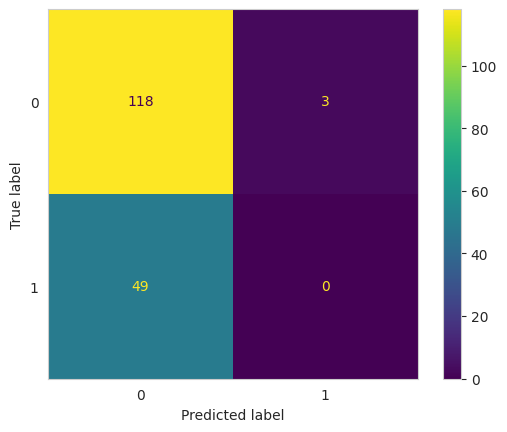

In [ ]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, model_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Dalam confusion matrix random forest terlihat ada 3 pasien yang sebenarnya tidak memiliki penyakit liver namun terprediksi memiliki penyakit liver.

# Model Saving

In [ ]:
# save tuned-model random forest
with open('rf_model1.pkl','wb') as file_1:
    joblib.dump(model,file_1)

# Kesimpulan

Pada dataset ini dilakukan dengan cara empat model yaitu KNeighborsClassifier, Decision Tree, Random Forest dan SVC. Dan best model yang didapatkan adalah Random Forest. Dalam dataset ini terdapat problem, diantaranya data imbalanced dan outliers.

Untuk study kasus disini adalah meminimalisir False Positif. Dalam kasus precision ini, konteks yang saya ambil adalah seseorang yang sebenarnya tidak memiliki penyakit liver namun terprediksi memiliki penyakit liver.

Dalam exploratory data analysis, jumlah pasien berdasarkan gender male sebanyak 428 sedangkan female sebanyak 138. Dan jumlah pasien yang memiliki penyakit liver sebnayak 404 pasien dan yang tidak memiliki penyakit liver sebanyak 162. Sehingga berdasarkan data tersebut didaparkan bahwa gender male lebih banyak memiliki penyakit liver dibandingkan female.

Selain itu juga terdapat beberapa faktor yang mempengaruhi penyakit liver, diantaranya albumin and globulin ratio, albumin, dan total protiens.

Berdasarkan evaluasi tuning random forest dihasilkan bahwa seseorang yang sebenarnya tidak memiliki penyakit liver namun terprediksi memiliki penyakit liver sebanyak 3 pasien. Akan tetapi sebelum dilakukan tuning ini, model random forest menghasilkan precision atau seseorang yang sebenarnya tidak memiliki penyakit liver namun terprediksi memiliki penyakit liver sebanyak 2 pasien. Hal ini bis asaja terjadi karena parameter tuning yang saya ambil kurang tepat. Selain itu bisa saja terjadi karena data test tidak seimbang antara value 1 dan 2.

